## Importing Required Libraries

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.svm import SVC

## Creating Random Experimental Data

In [4]:
def gen_lin_separable_data():
    mean1 = np.array([0, 2])
    mean2 = np.array([2, 0])
    cov = np.array([[0.8, 0.6], [0.6, 0.8]])
    X1 = np.random.multivariate_normal(mean1, cov, 200)
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, 200)
    y2 = np.ones(len(X2)) * -1
    X1_train = X1[:150]
    y1_train = y1[:150]
    X2_train = X2[:150]
    y2_train = y2[:150]
    X_train = np.vstack((X1_train, X2_train))
    y_train = np.hstack((y1_train, y2_train))
    X1_test = X1[150:]
    y1_test = y1[150:]
    X2_test = X2[150:]
    y2_test = y2[150:]
    X_test = np.vstack((X1_test, X2_test))
    y_test = np.hstack((y1_test, y2_test))
    return X_train, y_train, X_test, y_test


In [5]:
def gen_lin_separable_overlap_data(size_of_each_class, test_size_of_each_class):
    # generate training data in the 2-d case
    mean1 = np.array([0, 2])
    mean2 = np.array([2, 0])
    cov = np.array([[1.5, 1.0], [1.0, 1.5]])
    X1 = np.random.multivariate_normal(mean1, cov, size_of_each_class + test_size_of_each_class)
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, size_of_each_class + test_size_of_each_class)
    y2 = np.ones(len(X2)) * -1
    X1_train = X1[:size_of_each_class]
    y1_train = y1[:size_of_each_class]
    X2_train = X2[:size_of_each_class]
    y2_train = y2[:size_of_each_class]
    X_train = np.vstack((X1_train, X2_train))
    y_train = np.hstack((y1_train, y2_train))
    X1_test = X1[size_of_each_class:]
    y1_test = y1[size_of_each_class:]
    X2_test = X2[size_of_each_class:]
    y2_test = y2[size_of_each_class:]
    X_test = np.vstack((X1_test, X2_test))
    y_test = np.hstack((y1_test, y2_test))
    return X_train, y_train, X_test, y_test

In [6]:
X_train, y_train, X_test, y_test = gen_lin_separable_overlap_data(size_of_each_class = 1000, test_size_of_each_class = 200)

## Visualizing Initial Train and Test Data

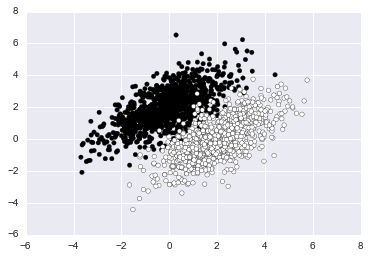

In [7]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

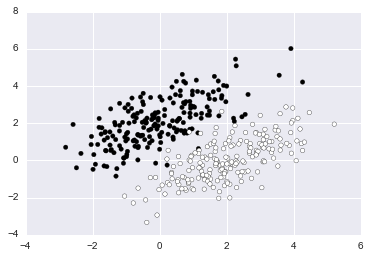

In [8]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

## Training SVM Model

In [9]:
svm = SVC(kernel='linear', C=1)

In [10]:
clf = svm.fit(X_train,y_train)

In [11]:
clf.predict(X_test)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test, clf.predict(X_test))

array([[195,   5],
       [  6, 194]])

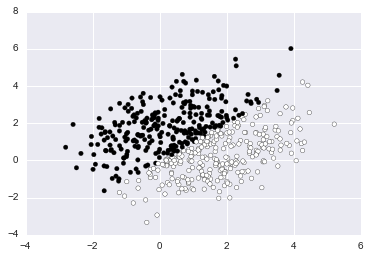

In [14]:
plt.scatter(X_test[:,0], X_test[:,1], c = clf.predict(X_test))
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], c = clf.predict(clf.support_vectors_), s=20)

### Plotting Decision Boundary

In [15]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 8)
yy = a * xx - (clf.intercept_[0]) / w[1]

#### Parrallel Hyperplanes

In [16]:
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy + a * margin
yy_up = yy - a * margin

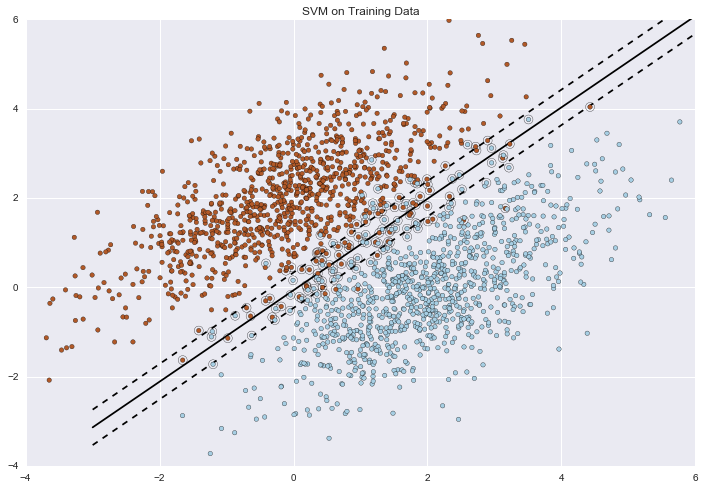

In [17]:
plt.figure(figsize=(12,8))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired)
plt.xlim([-4,6])
plt.ylim([-4,6])
plt.title("SVM on Training Data")

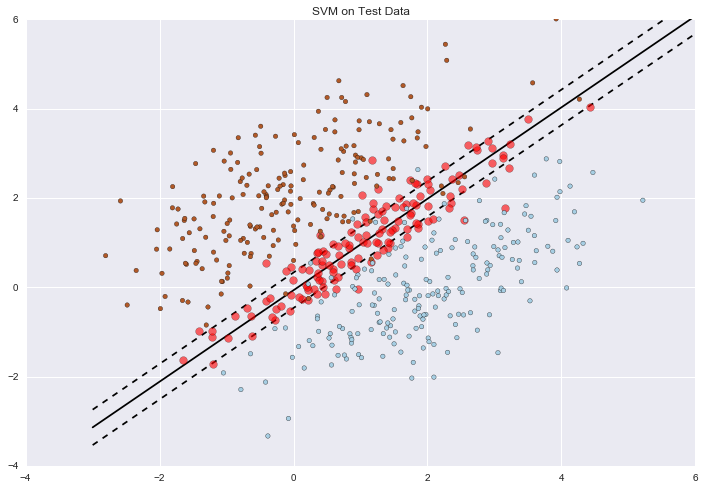

In [18]:
plt.figure(figsize=(12,8))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=60, zorder=10, c='r', alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, zorder=10, cmap=plt.cm.Paired)
plt.xlim([-4,6])
plt.ylim([-4,6])
plt.title("SVM on Test Data")

##### <<<<------- Till Here Basic SVM Is Implemented ------->>>> 

### Starting With Incremental SVM 

Randomly Dividing Training Set in 5 chunks and keeping test set constant to check for accuracy

In [19]:
train = np.column_stack((X_train, y_train))
test = np.column_stack((X_test, y_test))

In [20]:
## Shuffling Train
np.random.shuffle(train)

In [21]:
split_train = np.split(train, 10)

In [22]:
X1_train, y1_train = split_train[0][:,:2], split_train[0][:,2]
X2_train, y2_train = split_train[1][:,:2], split_train[1][:,2]
X3_train, y3_train = split_train[2][:,:2], split_train[2][:,2]
X4_train, y4_train = split_train[3][:,:2], split_train[3][:,2]
X5_train, y5_train = split_train[4][:,:2], split_train[4][:,2]

In [23]:
X_test, y_test = test[:,:2], test[:,2]

#### Making First SVM with first chunk of train data and testing for accuracy on test data

In [24]:
clf1 = svm.fit(X1_train,y1_train)

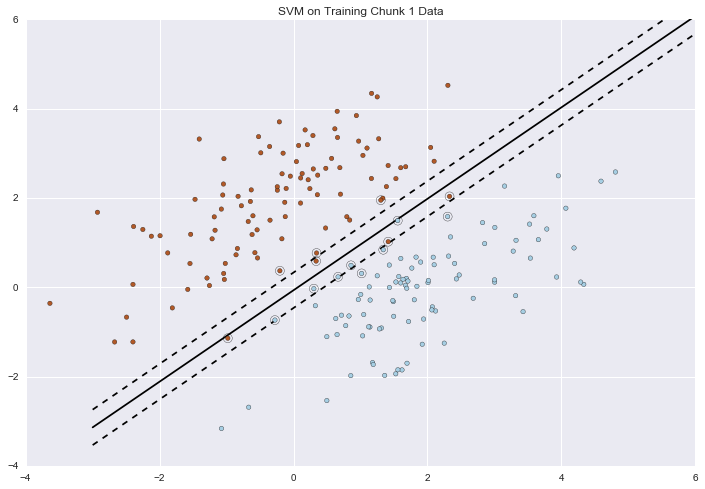

In [25]:
plt.figure(figsize=(12,8))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10)
plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y1_train, zorder=10, cmap=plt.cm.Paired)
plt.xlim([-4,6])
plt.ylim([-4,6])
plt.title("SVM on Training Chunk 1 Data")

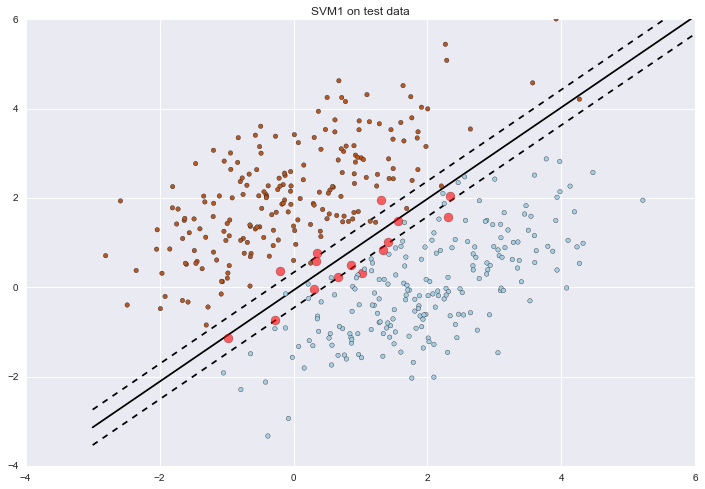

In [26]:
plt.figure(figsize=(12,8))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, c='r', alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf1.predict(X_test), zorder=10, cmap=plt.cm.Paired)
plt.xlim([-4,6])
plt.ylim([-4,6])
plt.title("SVM1 on test data")

#### Adding support vectors of X1_train in X2_train

In [27]:
#indices of support vectors
clf1.support_

array([  1,   9,  82,  85, 103, 166, 167, 172,  20,  23,  26, 109, 110,
       118, 194])

In [28]:
X2_train.shape, y2_train.shape

((200, 2), (200,))

In [29]:
X1_support_vectors = X1_train[clf1.support_]
y1_support_vectors = y1_train[clf1.support_]

In [30]:
X2_train = np.row_stack((X2_train, X1_support_vectors))
y2_train = np.concatenate((y2_train, y1_support_vectors))

In [31]:
svm2 = SVC(kernel="linear",C=1.0)
clf2 = svm2.fit(X1_train,y1_train)

In [32]:
X2_train.shape, y2_train.shape

((215, 2), (215,))

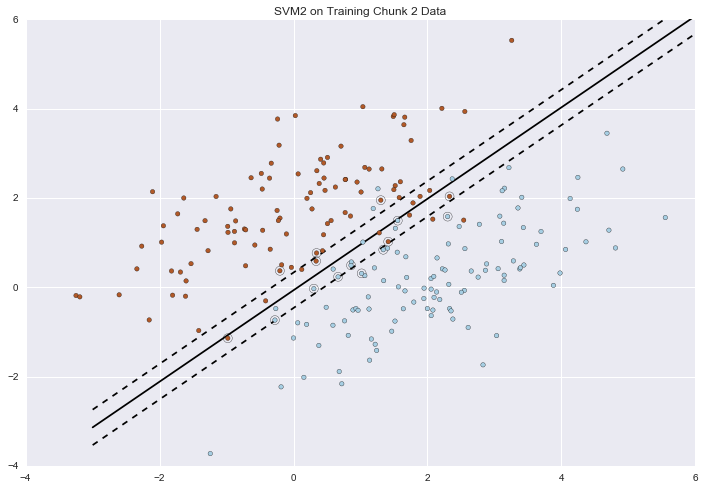

In [33]:
plt.figure(figsize=(12,8))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=80,facecolors='none', zorder=10)
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=y2_train, zorder=10, cmap=plt.cm.Paired)
plt.xlim([-4,6])
plt.ylim([-4,6])
plt.title("SVM2 on Training Chunk 2 Data")

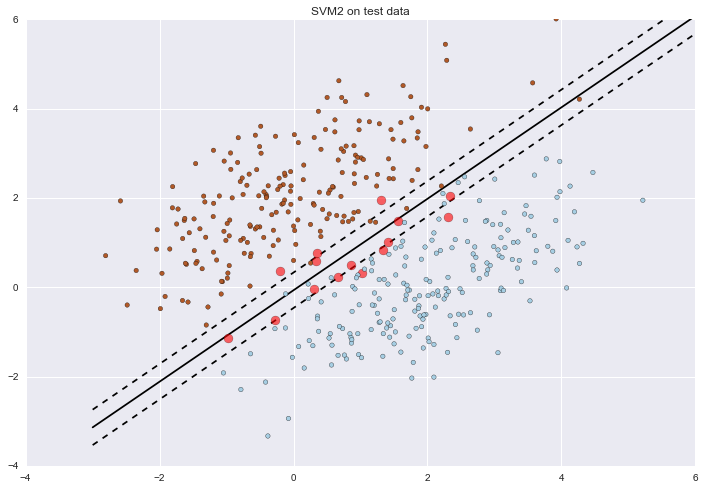

In [34]:
plt.figure(figsize=(12,8))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, c='r', alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf2.predict(X_test), zorder=10, cmap=plt.cm.Paired)
plt.xlim([-4,6])
plt.ylim([-4,6])
plt.title("SVM2 on test data")

In [35]:
# j = 1
# count = 1
# accuracy = []
# plt.figure(figsize=(15, 12))
# X_list = [X1_train, X2_train, X3_train, X4_train, X5_train]
# y_list = [y1_train, y2_train, y3_train, y4_train, y5_train]
# clf = svm.fit(X1_train, y1_train)
# plt.subplot(5,2,j)
# #plt.figure(j, figsize=(6,4))
# j+=1
# plt.plot(xx, yy, 'k-')
# plt.plot(xx, yy_down, 'k--')
# plt.plot(xx, yy_up, 'k--')
# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,facecolors='none', zorder=10)
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired)
# plt.xlim([-4,6])
# plt.ylim([-4,6])
# plt.title("SVM %d on Training Chunk %d Data" %(count, count))
# #plt.figure(j, figsize=(6,4))
# plt.subplot(5,2,j)
# j+=1
# plt.plot(xx, yy, 'k-')
# plt.plot(xx, yy_down, 'k--')
# plt.plot(xx, yy_up, 'k--')
# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
#             facecolors='none', zorder=10, c='r', alpha=0.6)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), zorder=10, cmap=plt.cm.Paired)
# plt.xlim([-4,6])
# plt.ylim([-4,6])
# plt.title("SVM %d on Test Data" %(count))
# accuracy.append(clf.score(X_test, y_test))
# count +=1
# prev_X = X_list[0]
# prev_y = y_list[0]
# for X, y in zip(X_list[1:], y_list[1:]):
#     #### Adding support vectors of X1_train in X2_train
#     X_prev_support_vectors = prev_X[clf.support_]
#     y_prev_support_vectors = prev_y[clf.support_]
#     X_train = np.row_stack((X, X_prev_support_vectors))
#     y_train = np.concatenate((y, y_prev_support_vectors))
#     clf = svm.fit(X_train,y_train)
#     plt.subplot(5,2,j)
#     #plt.figure(j, figsize=(6,4))
#     j+=1
#     plt.plot(xx, yy, 'k-')
#     plt.plot(xx, yy_down, 'k--')
#     plt.plot(xx, yy_up, 'k--')
#     plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,facecolors='none', zorder=10)
#     plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired)
#     plt.xlim([-4,6])
#     plt.ylim([-4,6])
#     plt.title("SVM %d on Training Chunk %d Data" %(count, count))
    
#     #plt.figure(j,figsize=(6,4))
#     plt.subplot(5,2,j)
#     j+=1
#     plt.plot(xx, yy, 'k-')
#     plt.plot(xx, yy_down, 'k--')
#     plt.plot(xx, yy_up, 'k--')
#     plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
#                 facecolors='none', zorder=10, c='r', alpha=0.6)
#     plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), zorder=10, cmap=plt.cm.Paired)
#     plt.xlim([-4,6])
#     plt.ylim([-4,6])
#     plt.title("SVM %d on Test Data" %(count))
#     accuracy.append(clf.score(X_test, y_test))
#     prev_X = X_train
#     prev_y = y_train
#     count+=1

In [36]:
# accuracy

In [37]:
# x_axes = range(1,10)
# plt.figure(figsize=(6,6))
# plt.plot(x_axes, accuracy, marker='o');
# plt.ylim([.85,1])
# plt.xlim([0,10])
# plt.title("Accuracy Varying with training tests chunks")

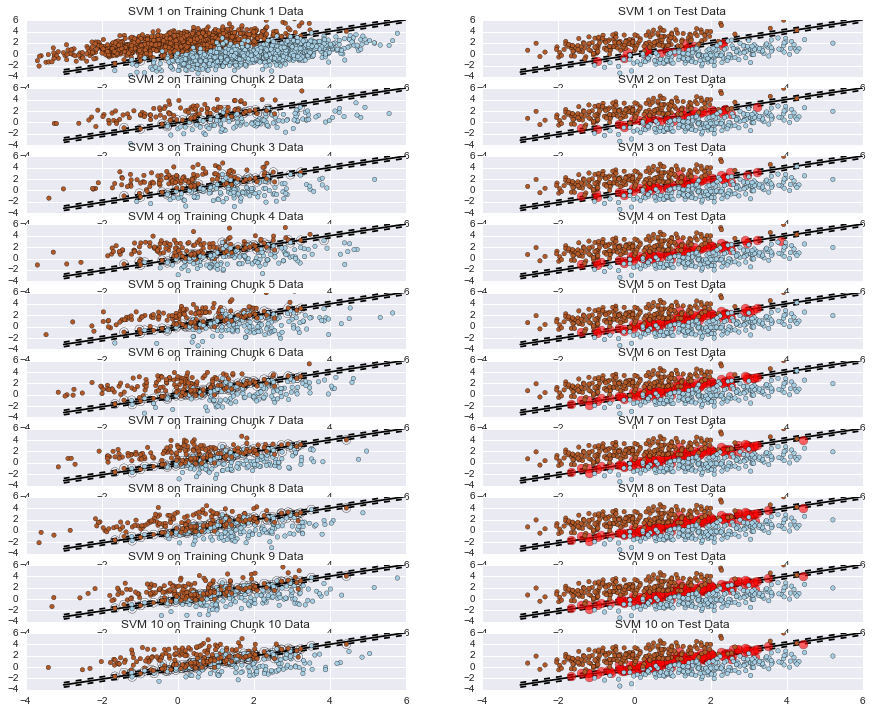

In [38]:
j = 1
count = 1
accuracy = []
clf = svm.fit(split_train[0][:,:2], split_train[0][:,2])
plt.figure(figsize=(15, 12))
plt.subplot(10,2,j)
#plt.figure(j, figsize=(6,4))
j+=1
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,facecolors='none', zorder=10)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired)
plt.xlim([-4,6])
plt.ylim([-4,6])
plt.title("SVM %d on Training Chunk %d Data" %(count, count))
#plt.figure(j, figsize=(6,4))
plt.subplot(10,2,j)
j+=1
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, c='r', alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), zorder=10, cmap=plt.cm.Paired)
plt.xlim([-4,6])
plt.ylim([-4,6])
plt.title("SVM %d on Test Data" %(count))
accuracy.append(clf.score(X_test, y_test))
count +=1
prev_X = split_train[0][:,:2]
prev_y = split_train[0][:,2]
for ex in split_train[1:]:
    X, y = ex[:,:2], ex[:,2]
    #### Adding support vectors of X1_train in X2_train
    X_prev_support_vectors = prev_X[clf.support_]
    y_prev_support_vectors = prev_y[clf.support_]
    X_train = np.row_stack((X, X_prev_support_vectors))
    y_train = np.concatenate((y, y_prev_support_vectors))
    clf = svm.fit(X_train,y_train)
    plt.subplot(10,2,j)
    #plt.figure(j, figsize=(6,4))
    j+=1
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,facecolors='none', zorder=10)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired)
    plt.xlim([-4,6])
    plt.ylim([-4,6])
    plt.title("SVM %d on Training Chunk %d Data" %(count, count))
    
    #plt.figure(j,figsize=(6,4))
    plt.subplot(10,2,j)
    j+=1
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, c='r', alpha=0.6)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), zorder=10, cmap=plt.cm.Paired)
    plt.xlim([-4,6])
    plt.ylim([-4,6])
    plt.title("SVM %d on Test Data" %(count))
    accuracy.append(clf.score(X_test, y_test))
    prev_X = X_train
    prev_y = y_train
    count+=1

In [39]:
accuracy

[0.97250000000000003,
 0.97999999999999998,
 0.96999999999999997,
 0.97250000000000003,
 0.97250000000000003,
 0.97250000000000003,
 0.97999999999999998,
 0.97999999999999998,
 0.97250000000000003,
 0.97999999999999998]

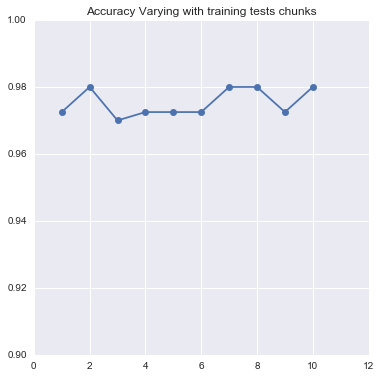

In [40]:
x_axes = range(1,11)
plt.figure(figsize=(6,6))
plt.plot(x_axes, accuracy, marker='o');
plt.ylim([.90,1])
plt.xlim([0,12])
plt.title("Accuracy Varying with training tests chunks")